In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from scipy.spatial.distance import cdist
import sklearn
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, Normalizer
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install spotipy

## Import Top 100 Pop Tracks

In [3]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials # To access authorised Spotify data


CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '3ZgmfR6lsnCwdffZUan8EA' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
pop = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
pop_describe= pd.DataFrame(pop.describe()).reset_index()

#make a new column for genre
pop['genre']= 'pop'

#check it out 
pop

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.645,0.585,-6.122,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop
1,0.799,0.586,-6.735,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop
2,0.581,0.963,-4.087,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop
3,0.663,0.712,-4.945,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop
4,0.738,0.483,-8.915,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop
...,...,...,...,...,...,...,...,...,...,...
95,0.712,0.799,-3.440,0.0329,0.04630,0.000000,0.0836,0.700,93.015,pop
96,0.602,0.923,-3.763,0.0440,0.00980,0.000000,0.0561,0.765,136.010,pop
97,0.711,0.700,-4.805,0.0460,0.00498,0.000125,0.2150,0.801,128.001,pop
98,0.713,0.781,-4.859,0.1210,0.03530,0.000000,0.1550,0.800,102.078,pop


## Import Top 100 Alternative Tracks

In [4]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '3jtuOxsrTRAWvPPLvlW1VR' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
alt = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
alt_describe= pd.DataFrame(alt.describe()).reset_index()

#make a new column for genre
alt['genre']= 'alternative'

#check it out 
alt

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.552,0.760,-6.861,0.0367,0.007130,0.011300,0.3130,0.338,104.957,alternative
1,0.608,0.642,-7.978,0.0251,0.170000,0.066700,0.1660,0.608,87.703,alternative
2,0.506,0.923,-3.478,0.0428,0.000839,0.000010,0.1190,0.315,105.047,alternative
3,0.753,0.757,-5.252,0.0330,0.087200,0.534000,0.1760,0.409,120.032,alternative
4,0.449,0.562,-6.322,0.0347,0.041500,0.885000,0.1050,0.346,120.964,alternative
...,...,...,...,...,...,...,...,...,...,...
95,0.264,0.914,-5.143,0.0554,0.003900,0.000000,0.1060,0.276,148.110,alternative
96,0.299,0.688,-5.483,0.0426,0.003710,0.000284,0.0451,0.176,165.667,alternative
97,0.308,0.954,-2.384,0.0660,0.000053,0.000000,0.1450,0.500,90.475,alternative
98,0.392,0.849,-4.577,0.0359,0.002120,0.000137,0.0848,0.317,171.094,alternative


## Import Top 100 Rock Tracks

In [5]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '3qu74M0PqlkSV76f98aqTd' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
rock = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
rock_describe= pd.DataFrame(rock.describe()).reset_index()

#make a new column for genre
rock['genre']= 'rock'

#check it out 
rock

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.519,0.981,-3.473,0.0726,0.001360,0.000155,0.0903,0.773,130.039,rock
1,0.552,0.760,-6.861,0.0367,0.007130,0.011300,0.3130,0.338,104.957,rock
2,0.531,0.903,-3.905,0.0582,0.153000,0.000003,0.1070,0.803,189.936,rock
3,0.506,0.923,-3.478,0.0428,0.000839,0.000010,0.1190,0.315,105.047,rock
4,0.508,0.935,-3.199,0.0455,0.000032,0.000000,0.0666,0.439,108.982,rock
...,...,...,...,...,...,...,...,...,...,...
95,0.445,0.980,-4.369,0.0731,0.000024,0.163000,0.1290,0.285,155.045,rock
96,0.289,0.909,-3.950,0.0979,0.000046,0.000254,0.0936,0.486,140.068,rock
97,0.543,0.707,-7.636,0.0700,0.614000,0.041400,0.1180,0.515,143.915,rock
98,0.613,0.918,-3.252,0.1560,0.238000,0.137000,0.1080,0.591,100.817,rock


## Top 100 Country Tracks

In [6]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '5tA2x3J6yAaJpa7mHGvhmB' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
country = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
country_describe= pd.DataFrame(country.describe()).reset_index()

#make a new column for genre
country['genre']= 'country'

#check it out 
country

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.558,0.719,-5.603,0.0419,0.1010,0.000000,0.2120,0.483,158.031,country
1,0.670,0.737,-6.794,0.0434,0.2230,0.000000,0.3250,0.754,92.983,country
2,0.514,0.889,-3.396,0.1060,0.2180,0.000000,0.1050,0.843,158.023,country
3,0.720,0.849,-2.246,0.0316,0.0279,0.000169,0.0971,0.956,105.012,country
4,0.684,0.724,-6.255,0.0230,0.0196,0.043300,0.0684,0.849,101.997,country
...,...,...,...,...,...,...,...,...,...,...
95,0.574,0.398,-6.999,0.0360,0.8350,0.000000,0.1020,0.380,77.575,country
96,0.500,0.714,-5.753,0.0361,0.4740,0.000000,0.0954,0.298,147.914,country
97,0.580,0.850,-5.112,0.0411,0.2410,0.000000,0.1900,0.578,91.953,country
98,0.693,0.335,-10.863,0.0395,0.3380,0.000552,0.1180,0.623,136.071,country


## Top 100 Hip Hop Tracks

In [7]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '06KmJWiQhL0XiV6QQAHsmw' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
hip = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
hip_describe= pd.DataFrame(hip.describe()).reset_index()

#make a new column for genre
hip['genre']= 'hip-hop'

#check it out 
hip

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.844,0.624,-4.966,0.1500,0.03940,0.000000,0.1020,0.481,123.030,hip-hop
1,0.863,0.493,-8.388,0.1460,0.01450,0.000001,0.0973,0.198,125.019,hip-hop
2,0.658,0.594,-6.150,0.2010,0.50700,0.087100,0.0700,0.601,91.054,hip-hop
3,0.534,0.841,-4.028,0.3100,0.00723,0.000000,0.4230,0.297,176.094,hip-hop
4,0.828,0.487,-6.142,0.0343,0.24700,0.000019,0.1360,0.761,85.027,hip-hop
...,...,...,...,...,...,...,...,...,...,...
95,0.717,0.862,-4.736,0.0540,0.00689,0.000000,0.3210,0.520,130.021,hip-hop
96,0.760,0.630,-9.585,0.0499,0.39500,0.025900,0.1110,0.307,128.921,hip-hop
97,0.770,0.664,-5.604,0.2110,0.21500,0.000118,0.1050,0.472,140.163,hip-hop
98,0.558,0.668,-7.478,0.3970,0.22300,0.000000,0.1070,0.574,173.815,hip-hop


## Top 100 Indie Tracks

In [8]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '4dJHrPYVdKgaCE3Lxrv1MZ' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
indie = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
indie_describe= pd.DataFrame(indie.describe()).reset_index()

#make a new column for genre
indie['genre']= 'indie'

#check it out 
indie

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.366,0.685,-5.910,0.0437,0.03430,0.024800,0.2320,0.369,113.706,indie
1,0.570,0.171,-20.698,0.0317,0.98000,0.253000,0.1260,0.292,90.989,indie
2,0.552,0.760,-6.861,0.0367,0.00713,0.011300,0.3130,0.338,104.957,indie
3,0.531,0.903,-3.905,0.0582,0.15300,0.000003,0.1070,0.803,189.936,indie
4,0.581,0.768,-7.238,0.0306,0.00187,0.000456,0.1020,0.307,132.198,indie
...,...,...,...,...,...,...,...,...,...,...
95,0.599,0.744,-6.369,0.0238,0.00149,0.000594,0.1100,0.681,94.018,indie
96,0.546,0.911,-4.639,0.0729,0.01350,0.000000,0.4930,0.678,145.205,indie
97,0.627,0.713,-10.057,0.0343,0.10900,0.071700,0.1290,0.727,126.043,indie
98,0.756,0.624,-6.623,0.0384,0.31300,0.310000,0.0983,0.789,109.530,indie


## Top 100 Electronic Tracks

In [9]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '1zsMB814a8VhwohGe2ZTpd' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
electronic = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
electronic_describe= pd.DataFrame(electronic.describe()).reset_index()

#make a new column for genre
electronic['genre']= 'electronic'

#check it out 
electronic

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.545,0.780,-4.867,0.0436,0.03090,0.000046,0.0828,0.458,125.014,electronic
1,0.512,0.803,-5.135,0.0531,0.00362,0.000583,0.1160,0.591,124.162,electronic
2,0.550,0.919,-3.431,0.0788,0.13700,0.001180,0.0886,0.510,126.059,electronic
3,0.309,0.775,-4.915,0.0546,0.25800,0.000000,0.1020,0.279,84.731,electronic
4,0.695,0.869,-5.066,0.0483,0.41000,0.000000,0.2370,0.580,124.989,electronic
...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,-5.030,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic
96,0.704,0.793,-2.266,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic
97,0.816,0.658,-7.787,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic
98,0.600,0.905,-3.410,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic


## Top 100 Tracks

In [10]:
CLIENT_ID = '3e1c9e2eb4b64eaca10d96b1d881f94a'
CLIENT_SECRET = '693b0c056a7c4818b060b0adb07d22d1'

PLAYLIST_ID = '1zsMB814a8VhwohGe2ZTpd' # Spotify playlist id

# API Login
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

# Getting tracks of the playlist
tracks = sp.user_playlist_tracks(user = 'spotify', playlist_id = PLAYLIST_ID)
tracks_uri_list = [x['track']['uri'] for x in tracks['items']]

# Getting features of tracks
features = []
for i in tracks_uri_list:
    features = features + sp.audio_features(i)

# Creating feature dataframe
cols_to_drop = ['id', 'analysis_url', 'key', 'track_href', 'type', 'uri', 'mode', 'duration_ms', 'time_signature']
top = pd.DataFrame(features).drop(cols_to_drop, axis=1)

#create a df that stores pop.describe()
top_describe= pd.DataFrame(top.describe()).reset_index()

#make a new column for genre
top['genre']= 'top track'

#check it out 
top

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.545,0.780,-4.867,0.0436,0.03090,0.000046,0.0828,0.458,125.014,top track
1,0.512,0.803,-5.135,0.0531,0.00362,0.000583,0.1160,0.591,124.162,top track
2,0.550,0.919,-3.431,0.0788,0.13700,0.001180,0.0886,0.510,126.059,top track
3,0.309,0.775,-4.915,0.0546,0.25800,0.000000,0.1020,0.279,84.731,top track
4,0.695,0.869,-5.066,0.0483,0.41000,0.000000,0.2370,0.580,124.989,top track
...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,-5.030,0.0399,0.02900,0.000005,0.0954,0.595,128.008,top track
96,0.704,0.793,-2.266,0.0591,0.04880,0.000000,0.5750,0.412,127.960,top track
97,0.816,0.658,-7.787,0.1030,0.02800,0.000019,0.0382,0.739,124.990,top track
98,0.600,0.905,-3.410,0.0357,0.00274,0.000000,0.8310,0.636,124.032,top track


## Concat All Genres of Music

In [11]:
df= pd.concat([pop, alt, rock, country, hip, indie, electronic])
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.645,0.585,-6.122,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop
1,0.799,0.586,-6.735,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop
2,0.581,0.963,-4.087,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop
3,0.663,0.712,-4.945,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop
4,0.738,0.483,-8.915,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop
...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,-5.030,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic
96,0.704,0.793,-2.266,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic
97,0.816,0.658,-7.787,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic
98,0.600,0.905,-3.410,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic


## Scale Tempo

In [12]:
# scale tempo
tempo_col= df[['tempo']]
minmax = MinMaxScaler()
df_tempo_std= minmax.fit_transform(tempo_col)
df["tempo_scaled"] = df_tempo_std

#drop loudness
df.drop(['loudness'], axis=1, inplace=True)

df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop,0.224705
...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic,0.428639


## Exploratory Data Analysis

In [19]:
# check summary stats
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_scaled
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.573763,0.765173,0.079295,0.111574,0.078756,0.188890,0.489295,125.625244,0.439266
std,0.150068,0.158407,0.076654,0.175336,0.210672,0.142927,0.219536,26.836023,0.179001
min,0.132000,0.121000,0.023000,0.000002,0.000000,0.028400,0.035000,59.770000,0.000000
25%,0.488750,0.669000,0.036000,0.004978,0.000000,0.097975,0.320750,107.004000,0.315059
50%,0.574500,0.790000,0.049500,0.033750,0.000016,0.130000,0.487000,126.003500,0.441789
75%,0.685000,0.886000,0.079200,0.137000,0.005445,0.248500,0.660000,140.020250,0.535284
max,0.960000,0.991000,0.533000,0.980000,0.926000,0.868000,0.978000,209.691000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8a21de10>,
      dtype=object)

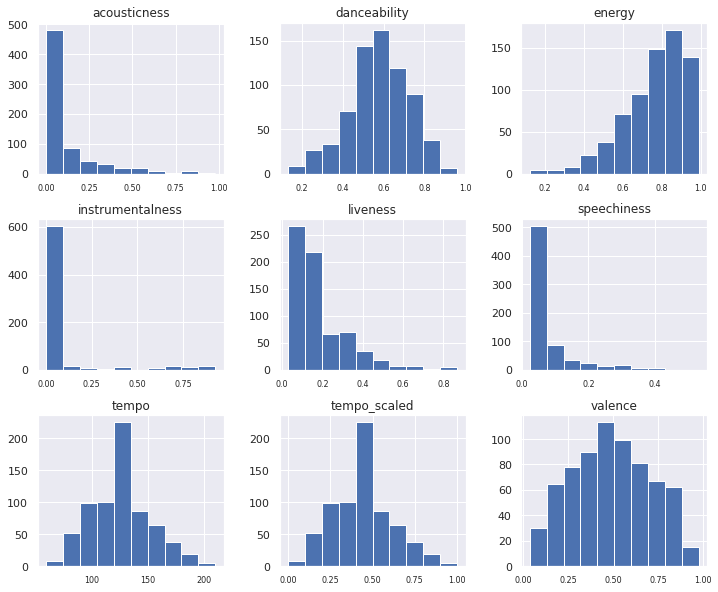

In [17]:
# make histograms
sns.set(font_scale=1)
df.hist(xlabelsize=8, figsize=(12,10))

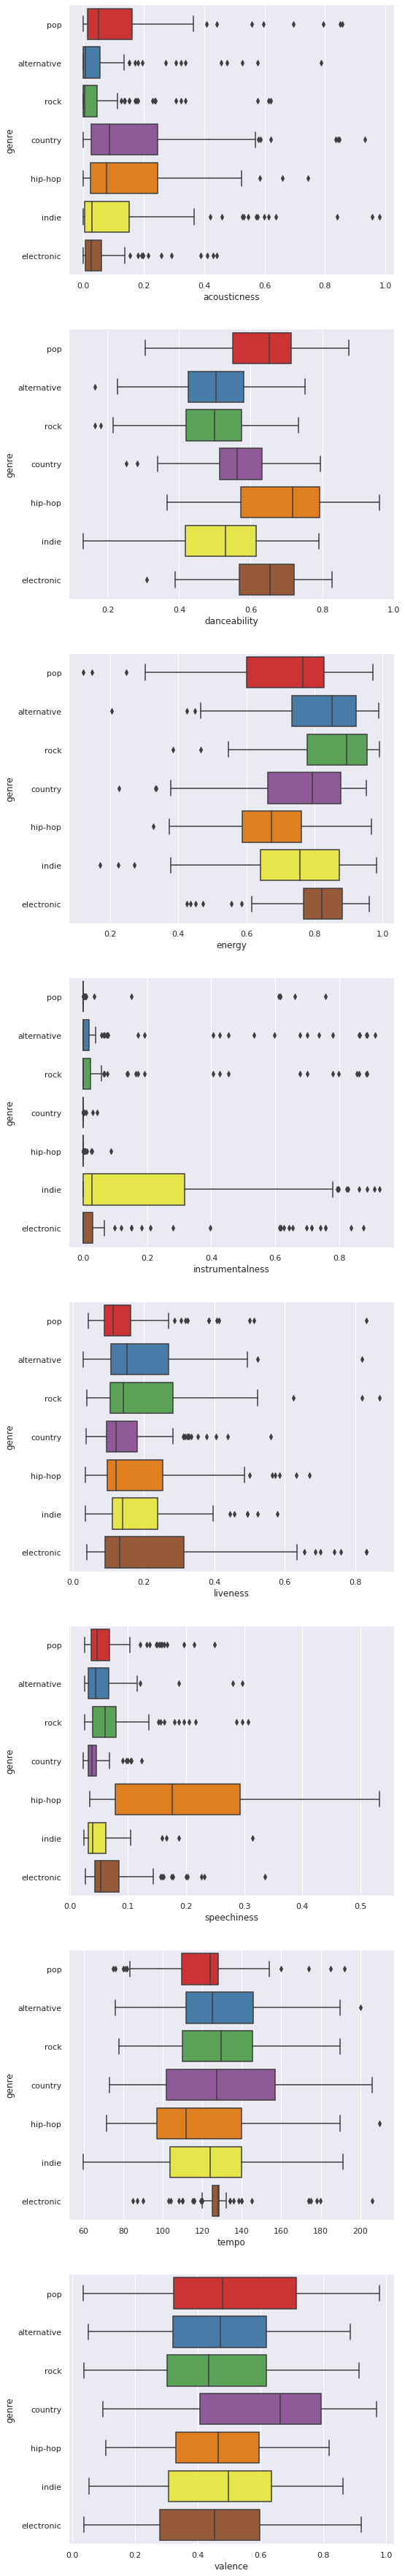

In [14]:
feats = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_features = len(feats)

fig, axes = plt.subplots(n_features, 1, figsize=(8,8*n_features))

for i in range(n_features):
    ax = axes[i]
    feature = feats[i]
    sns.boxplot(x=feature, y='genre', data=df, ax=ax, palette='Set1')

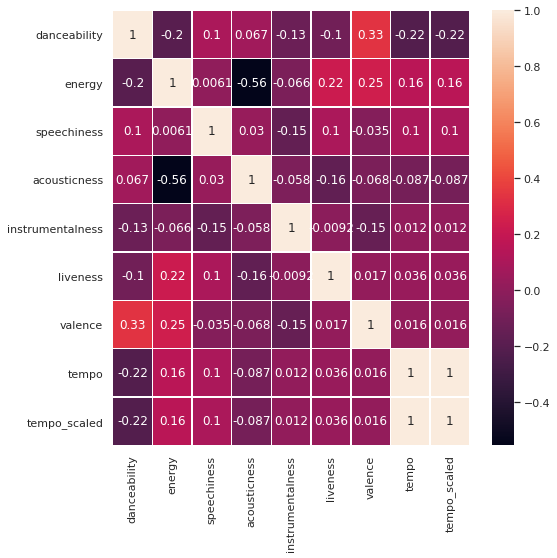

In [0]:
_#make heatmap
sns.set(font_scale=1)
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True,linewidth=0.5)
plt.show() # ta-da!

* as danceability increases valence(hapiness) increases
* as energy increases loudness increases 
* as energy and loudness increase acousticness decrease 

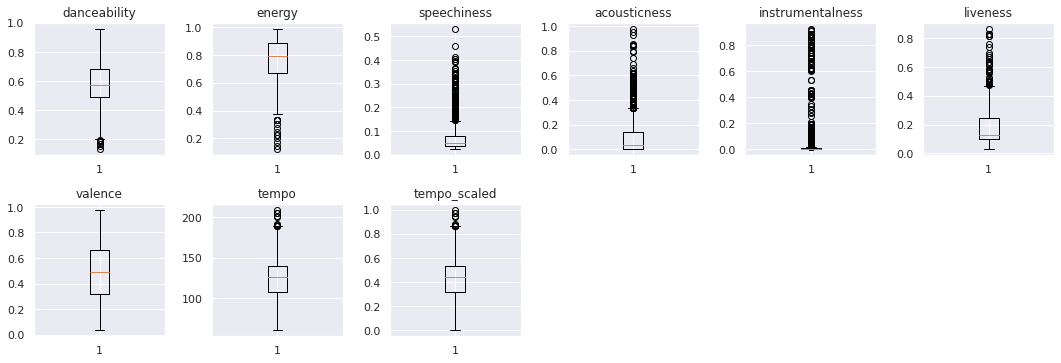

In [0]:
#check for outliers
cols=df.select_dtypes(['int64', 'float64']).columns

plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
  plt.subplot(6,6,i+1)
  plt.boxplot(df[col], whis=1.5)
  plt.title(col)
plt.tight_layout()
plt.show()

## Define X

In [0]:
# drop instrumentalness 

In [0]:
X= df.drop(['genre', 'tempo'], axis=1)

In [0]:
X.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.573727,0.765187,0.079275,0.111591,0.078758,0.188887,0.489259,0.438922
std,0.150133,0.158387,0.076458,0.175365,0.210671,0.142926,0.219511,0.179146
min,0.132000,0.121000,0.023000,0.000002,0.000000,0.028400,0.035000,0.000000
25%,0.488750,0.669000,0.036000,0.004978,0.000000,0.097525,0.320750,0.313340
50%,0.574500,0.790000,0.049500,0.033750,0.000016,0.130000,0.487000,0.441773
75%,0.685000,0.886000,0.079200,0.137000,0.005445,0.248500,0.660750,0.535284
max,0.960000,0.991000,0.533000,0.980000,0.926000,0.868000,0.978000,1.000000


In [0]:
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,0.224705
...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,0.428639


In [0]:
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop,0.224705
...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic,0.428639


## Normalize Columns

In [0]:
df_norm= df.copy()

cols= ['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

# Normalize audio columns
norm = Normalizer()
df_norm[cols] = norm.fit_transform(df_norm[cols])

In [0]:
df_norm

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled
0,0.004889,0.004434,0.000389,0.000024,0.000000e+00,0.001251,0.002676,0.999974,pop,0.481327
1,0.006605,0.004844,0.000312,0.001339,1.678025e-08,0.001595,0.004538,0.999954,pop,0.408215
2,0.004469,0.007408,0.000755,0.000227,0.000000e+00,0.001069,0.006062,0.999943,pop,0.468393
3,0.005434,0.005835,0.000312,0.000532,0.000000e+00,0.000975,0.003934,0.999960,pop,0.415179
4,0.007896,0.005168,0.000431,0.000280,6.590707e-03,0.001134,0.003798,0.999926,pop,0.224705
...,...,...,...,...,...,...,...,...,...,...
95,0.004984,0.006952,0.000312,0.000227,4.179227e-08,0.000745,0.004648,0.999952,electronic,0.455160
96,0.005501,0.006197,0.000462,0.000381,0.000000e+00,0.004493,0.003220,0.999950,electronic,0.454840
97,0.006528,0.005264,0.000824,0.000224,1.496040e-07,0.000306,0.005912,0.999947,electronic,0.435029
98,0.004837,0.007296,0.000288,0.000022,0.000000e+00,0.006699,0.005127,0.999926,electronic,0.428639


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f101e9c3c50>,
      dtype=object)

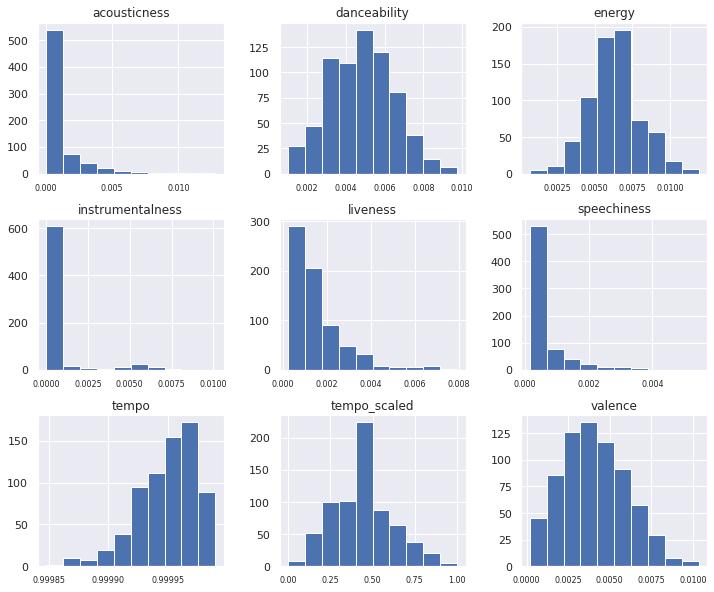

In [0]:
# make histograms
sns.set(font_scale=1)
df_norm.hist(xlabelsize=8, figsize=(12,10))

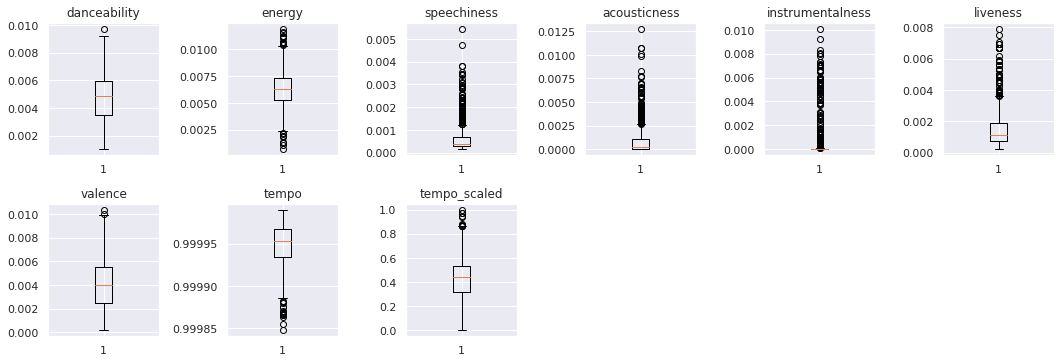

In [0]:
#compare boxplots
cols=df_norm.select_dtypes(['int64', 'float64']).columns

plt.figure(figsize=(15,15))
for i, col in enumerate(cols):
  plt.subplot(6,6,i+1)
  plt.boxplot(df_norm[col], whis=1.5)
  plt.title(col)
plt.tight_layout()
plt.show()

In [0]:
# outliers look equally bad...

In [0]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tempo_scaled
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.573727,0.765187,0.079275,0.111591,0.078758,0.188887,0.489259,125.573617,0.438922
std,0.150133,0.158387,0.076458,0.175365,0.210671,0.142926,0.219511,26.857806,0.179146
min,0.132000,0.121000,0.023000,0.000002,0.000000,0.028400,0.035000,59.770000,0.000000
25%,0.488750,0.669000,0.036000,0.004978,0.000000,0.097525,0.320750,106.746250,0.313340
50%,0.574500,0.790000,0.049500,0.033750,0.000016,0.130000,0.487000,126.001000,0.441773
75%,0.685000,0.886000,0.079200,0.137000,0.005445,0.248500,0.660750,140.020250,0.535284
max,0.960000,0.991000,0.533000,0.980000,0.926000,0.868000,0.978000,209.691000,1.000000


## Kmeans

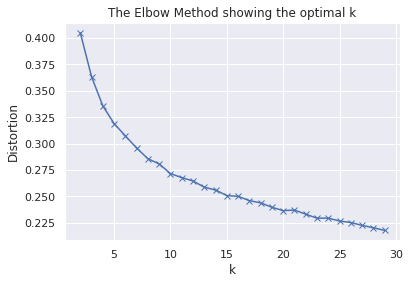

In [0]:
# Find optimal number of clusters
from scipy.spatial.distance import cdist
distortions= []
K= range(2,30)

for k in K:
  models= KMeans(n_clusters=k).fit(X)
  models.fit(X)
  distortions.append(sum(np.min(cdist(X, models.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

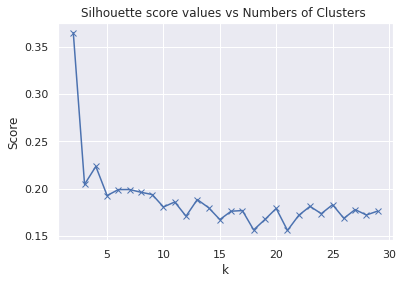

In [0]:
# Find optimal silhouette score

silhouette_score_values=list()

for k in K:
    
    classifier=cluster.KMeans(k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(X)
    labels= classifier.predict(X)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(X,labels ,metric='euclidean', sample_size=None, random_state=None))

# Plot the graph
plt.plot(K, silhouette_score_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

In [0]:
# Translate silhouette graph to numbers
for nclust in range(2,10):
  full_pred = KMeans(n_clusters=nclust).fit_predict(X)
  labels = KMeans(n_clusters=nclust).fit_predict(X)
  print(metrics.silhouette_score(X, labels, metric='euclidean'))

0.36469915944481013
0.20452760355888566
0.2235338096845971
0.19276013113055668
0.19988698691821793
0.18792315021421813
0.19433721462006556
0.19370883222172908


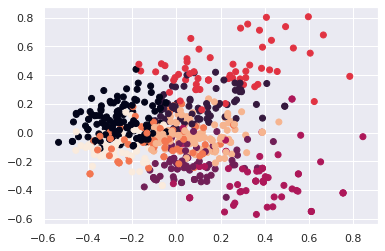

In [0]:
# Make model with actual number of genres
kmeans_model = KMeans(n_clusters=8).fit(X)
preds = kmeans_model.predict(X)

# Apply PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds)
plt.show()

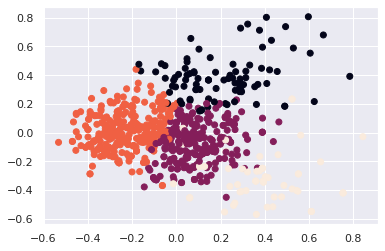

In [0]:
# Make model with optimal k
kmeans_model = KMeans(n_clusters=4).fit(X)
preds = kmeans_model.predict(X)

# Apply PCA for visualization
X_pca = PCA(n_components=2).fit_transform(X)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds)
plt.show()

In [0]:
#group df by genre and agg by mean
genre_groupby = df.groupby('genre').agg('mean')

#rename genre to cluster 
clusters_mean = genre_groupby.reset_index().rename({'genre':'cluster'}, axis=1)

#Fill method column with mean 
clusters_mean['method'] = 'Mean'

#drop unscaled tempo
clusters_mean.drop(['tempo'], axis=1, inplace=True)

clusters_mean

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,alternative,0.49176,0.81127,0.057190,0.064956,0.106921,0.195383,0.471241,0.461825,Mean
1,country,0.56588,0.74833,0.042510,0.175695,0.000896,0.158135,0.611501,0.460595,Mean
2,electronic,0.64461,0.80729,0.073167,0.060123,0.117609,0.228333,0.455665,0.455939,Mean
3,hip-hop,0.69397,0.67398,0.191337,0.157401,0.001735,0.195964,0.461930,0.394765,Mean
4,indie,0.50584,0.74424,0.052668,0.137156,0.198142,0.188701,0.471636,0.428872,Mean
5,pop,0.63242,0.71516,0.063768,0.128489,0.034824,0.153209,0.498971,0.405045,Mean
6,rock,0.48161,0.85604,0.074282,0.057314,0.091177,0.202481,0.453871,0.465412,Mean


In [0]:
# Adding predictions to dataframe
X['cluster'] = preds

# Grouping clusters to see the averages
clusters_kmeans = X.groupby('cluster').agg('mean').reset_index()

# fill method columns with KMeans
clusters_kmeans['method'] = 'KMeans'


clusters_kmeans

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,0,0.614000,0.519625,0.091047,0.457115,0.023006,0.122543,0.371323,0.368757,KMeans
1,1,0.503525,0.801996,0.090083,0.043867,0.013365,0.200238,0.329071,0.470398,KMeans
2,2,0.635701,0.810165,0.072801,0.077065,0.017702,0.197774,0.689536,0.430175,KMeans
3,3,0.518952,0.748855,0.047798,0.066126,0.717629,0.193918,0.385819,0.448078,KMeans


In [0]:
# concat orginal genre means and clusters
clusters= pd.concat([clusters_mean, clusters_kmeans])
clusters

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,alternative,0.491760,0.811270,0.057190,0.064956,0.106921,0.195383,0.471241,0.461825,Mean
1,country,0.565880,0.748330,0.042510,0.175695,0.000896,0.158135,0.611501,0.460595,Mean
2,electronic,0.644610,0.807290,0.073167,0.060123,0.117609,0.228333,0.455665,0.455939,Mean
3,hip-hop,0.693970,0.673980,0.191337,0.157401,0.001735,0.195964,0.461930,0.394765,Mean
4,indie,0.505840,0.744240,0.052668,0.137156,0.198142,0.188701,0.471636,0.428872,Mean
5,pop,0.632420,0.715160,0.063768,0.128489,0.034824,0.153209,0.498971,0.405045,Mean
6,rock,0.481610,0.856040,0.074282,0.057314,0.091177,0.202481,0.453871,0.465412,Mean
0,0,0.614000,0.519625,0.091047,0.457115,0.023006,0.122543,0.371323,0.368757,KMeans
1,1,0.503525,0.801996,0.090083,0.043867,0.013365,0.200238,0.329071,0.470398,KMeans
2,2,0.635701,0.810165,0.072801,0.077065,0.017702,0.197774,0.689536,0.430175,KMeans


In [0]:
X['cluster'] = preds
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,cluster
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,0.481327,1
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,0.408215,2
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,0.468393,2
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,0.415179,2
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,0.224705,3
...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,0.455160,2
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,0.454840,1
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,0.435029,2
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,0.428639,2


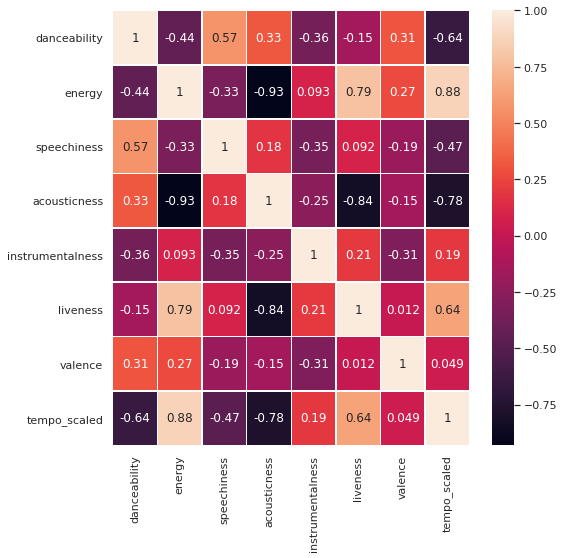

In [0]:
#make heatmap
sns.set(font_scale=1)
plt.figure(figsize=(8,8))
corr = clusters.corr()
sns.heatmap(corr, annot=True, linewidth=0.5)


In [0]:
df['cluster'] = preds

In [0]:
# redefine X
X= df.drop(['cluster', 'genre', 'tempo'], axis=1)

In [0]:
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,0.224705
...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,0.428639


In [0]:
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled,cluster
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop,0.481327,1
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop,0.408215,2
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop,0.468393,2
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop,0.415179,2
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop,0.224705,3
...,...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic,0.455160,2
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic,0.454840,1
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic,0.435029,2
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic,0.428639,2


In [0]:
#run PCA with 2 components for graphing
pca = PCA(n_components=2)

#fit transform 
X_new = pca.fit_transform(X)

#store in X and Y
x,y = zip(*X_new)
df['x'] = x
df['y'] = y

Text(0.5, 1.0, 'Clustering by Genre, Reduced Dimension')

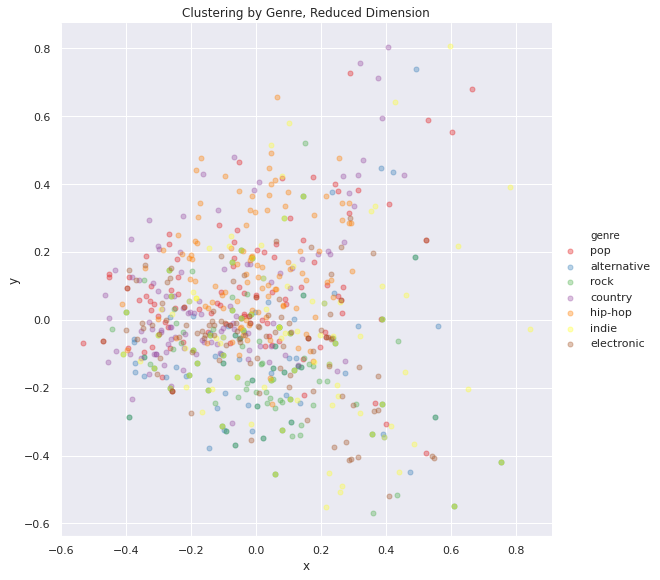

In [0]:
#plot clustered genres
sns.lmplot(data=df, x='x', y='y', hue='genre', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.savefig('pca_scatter_genres.png')
plt.title("Clustering by Genre, Reduced Dimension")

In [0]:
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled,cluster,x,y
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop,0.481327,1,0.089008,0.061488
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop,0.408215,2,-0.067671,0.229396
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop,0.468393,2,-0.345124,-0.095864
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop,0.415179,2,-0.035174,0.078922
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop,0.224705,3,0.386605,0.003698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic,0.455160,2,-0.180230,-0.040286
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic,0.454840,1,-0.048992,-0.065295
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic,0.435029,2,-0.261495,0.153247
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic,0.428639,2,-0.259160,-0.210020


In [0]:
df['cluster'] = preds

Text(0.5, 1.0, 'Clustering by KMeans, Reduced Dimension')

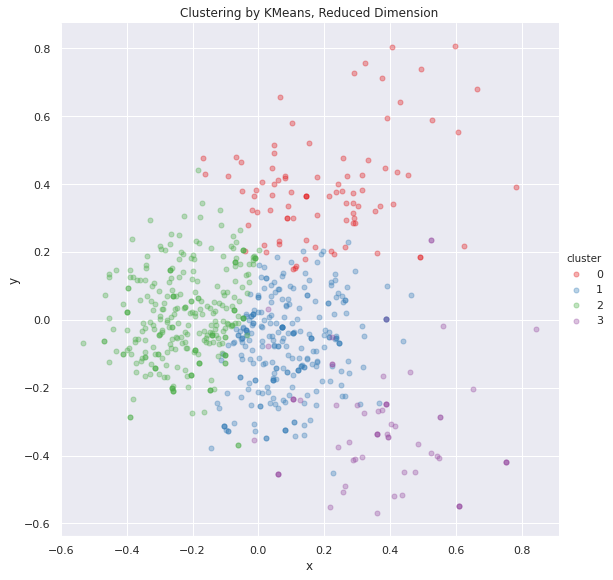

In [0]:
# Plot Kmeans cluster
sns.lmplot(data=df, x='x', y='y', hue='cluster', fit_reg=False, legend=True, size=8, palette='Set1',
           scatter_kws={'alpha':0.35, 's':25})
plt.title("Clustering by KMeans, Reduced Dimension")

## Try KMeans Normalising for Everything

In [0]:
# Define normalized X
Xn= df_norm.drop(['genre', 'tempo'], axis=1)

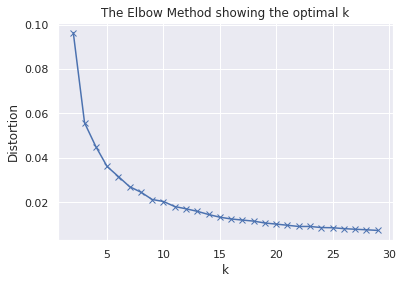

In [0]:
# Find optimal number of clusters
from scipy.spatial.distance import cdist
distortions= []
K= range(2,30)

for k in K:
  models= KMeans(n_clusters=k).fit(Xn)
  models.fit(Xn)
  distortions.append(sum(np.min(cdist(Xn, models.cluster_centers_, 'euclidean'), axis=1)) / Xn.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

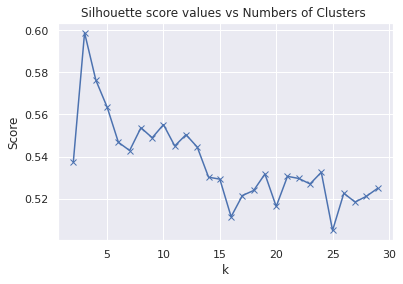

In [0]:
# Find optimal silhouette score

silhouette_score_values=list()

for k in K:
    
    classifier=cluster.KMeans(k,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(Xn)
    labels= classifier.predict(Xn)
    silhouette_score_values.append(sklearn.metrics.silhouette_score(Xn,labels ,metric='euclidean', sample_size=None, random_state=None))

# Plot the graph
plt.plot(K, silhouette_score_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Score')
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

In [0]:
# Translate silhouette graph to numbers
for nclust in range(2,10):
  full_pred = KMeans(n_clusters=nclust).fit_predict(Xn)
  labels = KMeans(n_clusters=nclust).fit_predict(Xn)
  print(metrics.silhouette_score(Xn, labels, metric='euclidean'))

0.5373329385823855
0.5987868413838338
0.5763043304999659
0.5640513883300357
0.5342630235541136
0.5424526351747232
0.5544623500446084
0.5487073489420764


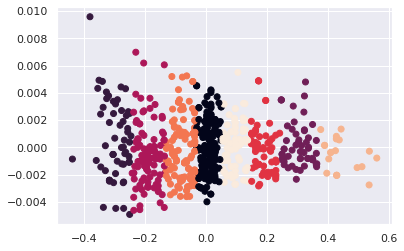

In [0]:
# Make model with actual number of genres
kmeans_model = KMeans(n_clusters=8).fit(Xn)
preds = kmeans_model.predict(Xn)

# Apply PCA for visualization
X_pca = PCA(n_components=2).fit_transform(Xn)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds)
plt.show()

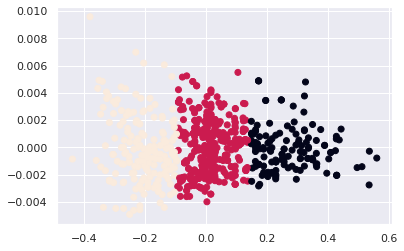

In [0]:
# Make model with optimal k
kmeans_model = KMeans(n_clusters=3).fit(Xn)
preds = kmeans_model.predict(Xn)

# Apply PCA for visualization
X_pca = PCA(n_components=2).fit_transform(Xn)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preds)
plt.show()

In [0]:
# Adding predictions to dataframe
Xn['cluster'] = preds

# Grouping clusters to see the averages
clusters_kmeans_n = Xn \
    .groupby('cluster') \
    .agg('mean').reset_index().rename({'cluster':'genre'}, axis=1)

clusters_kmeans_n['method'] = 'KMeans'


clusters_kmeans_n

,genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,0,0.002832,0.004749,0.000583,0.000701,0.000488,0.001166,0.003018,0.708880,KMeans
1,1,0.004788,0.006100,0.000541,0.000691,0.000755,0.001470,0.003839,0.454356,KMeans
2,2,0.006191,0.007781,0.000896,0.001663,0.000552,0.002012,0.005164,0.232480,KMeans


In [0]:
# normalize original clusters
genre_groupby = df_norm.groupby('genre').agg('mean')
clusters_mean_n = genre_groupby.reset_index().rename({'genres_top':'cluster'}, axis=1)
clusters_mean_n['method'] = 'Mean'
clusters_mean_n.drop(['tempo'], axis=1, inplace=True)

clusters_mean_n

,genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,alternative,0.004069,0.006538,0.000443,0.000591,0.000831,0.001586,0.003819,0.461825,Mean
1,country,0.004771,0.006135,0.000346,0.001607,0.000009,0.001265,0.004960,0.460595,Mean
2,electronic,0.005110,0.006399,0.000576,0.000479,0.000935,0.001777,0.003644,0.455939,Mean
3,hip-hop,0.006142,0.005992,0.001653,0.001438,0.000017,0.001747,0.004129,0.394765,Mean
4,indie,0.004273,0.006262,0.000427,0.001169,0.001681,0.001638,0.003976,0.428872,Mean
5,pop,0.005425,0.006127,0.000545,0.001115,0.000296,0.001316,0.004266,0.405045,Mean
6,rock,0.003929,0.006862,0.000591,0.000463,0.000729,0.001662,0.003686,0.465412,Mean


In [0]:
# concat orginal genre means and normalized clusters
clusters_n= pd.concat([clusters_mean_n, clusters_kmeans_n])
clusters_n

,genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled,method
0,alternative,0.004069,0.006538,0.000443,0.000591,0.000831,0.001586,0.003819,0.461825,Mean
1,country,0.004771,0.006135,0.000346,0.001607,0.000009,0.001265,0.004960,0.460595,Mean
2,electronic,0.005110,0.006399,0.000576,0.000479,0.000935,0.001777,0.003644,0.455939,Mean
3,hip-hop,0.006142,0.005992,0.001653,0.001438,0.000017,0.001747,0.004129,0.394765,Mean
4,indie,0.004273,0.006262,0.000427,0.001169,0.001681,0.001638,0.003976,0.428872,Mean
5,pop,0.005425,0.006127,0.000545,0.001115,0.000296,0.001316,0.004266,0.405045,Mean
6,rock,0.003929,0.006862,0.000591,0.000463,0.000729,0.001662,0.003686,0.465412,Mean
0,0,0.002832,0.004749,0.000583,0.000701,0.000488,0.001166,0.003018,0.708880,KMeans
1,1,0.004788,0.006100,0.000541,0.000691,0.000755,0.001470,0.003839,0.454356,KMeans
2,2,0.006191,0.007781,0.000896,0.001663,0.000552,0.002012,0.005164,0.232480,KMeans


## Try DBSCAN

In [0]:
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,0.224705
...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,0.428639


In [0]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=.25, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X)

clusters

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  3,  0,  0, -1,  0,  1,  0,  0,  0, -1,  0,  0,  0, -1,  0,
       -1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        3, -1,  3,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [0]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.1698545227234017


In [0]:
#increase eps
eps_nums = [.1, .2, .3, .4, .5, 1]

for i in eps_nums:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric='euclidean')
    clusters= dbscan_cluster.fit_predict(X)
    print('Number of cluster when epsilon is {}: is {}'.format(i, len(np.unique(clusters))))


Number of cluster when epsilon is 0.1: is 501
Number of cluster when epsilon is 0.2: is 168
Number of cluster when epsilon is 0.3: is 36
Number of cluster when epsilon is 0.4: is 10
Number of cluster when epsilon is 0.5: is 3
Number of cluster when epsilon is 1: is 1


In [0]:
for i in range (1, 30):
    dbscan_cluster = DBSCAN(eps=.3, min_samples=i, metric='euclidean')
    clusters = dbscan_cluster.fit_predict(X)
    print('Number of clusters when min_samples={} is: {}'.format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 36
Number of clusters when min_samples=2 is: 10
Number of clusters when min_samples=3 is: 6
Number of clusters when min_samples=4 is: 3
Number of clusters when min_samples=5 is: 4
Number of clusters when min_samples=6 is: 3
Number of clusters when min_samples=7 is: 2
Number of clusters when min_samples=8 is: 3
Number of clusters when min_samples=9 is: 3
Number of clusters when min_samples=10 is: 3
Number of clusters when min_samples=11 is: 3
Number of clusters when min_samples=12 is: 3
Number of clusters when min_samples=13 is: 3
Number of clusters when min_samples=14 is: 3
Number of clusters when min_samples=15 is: 3
Number of clusters when min_samples=16 is: 3
Number of clusters when min_samples=17 is: 3
Number of clusters when min_samples=18 is: 3
Number of clusters when min_samples=19 is: 3
Number of clusters when min_samples=20 is: 3
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of cluster

In [0]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=.3, min_samples=3, metric='euclidean')
clusters = dbscan_cluster.fit_predict(X)

print("The silhoutte score of the model with complete linkage is: {}"
      .format(metrics.silhouette_score(X, clusters, metric='euclidean')))

The silhoutte score of the model with complete linkage is: 0.10882111732361328


## Try Hierchical Clustering

In [0]:
X

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,0.481327
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,0.408215
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,0.468393
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,0.415179
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,0.224705
...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,0.455160
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,0.454840
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,0.435029
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,0.428639


In [0]:
X.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo_scaled
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.573727,0.765187,0.079275,0.111591,0.078758,0.188887,0.489259,0.438922
std,0.150133,0.158387,0.076458,0.175365,0.210671,0.142926,0.219511,0.179146
min,0.132000,0.121000,0.023000,0.000002,0.000000,0.028400,0.035000,0.000000
25%,0.488750,0.669000,0.036000,0.004978,0.000000,0.097525,0.320750,0.313340
50%,0.574500,0.790000,0.049500,0.033750,0.000016,0.130000,0.487000,0.441773
75%,0.685000,0.886000,0.079200,0.137000,0.005445,0.248500,0.660750,0.535284
max,0.960000,0.991000,0.533000,0.980000,0.926000,0.868000,0.978000,1.000000


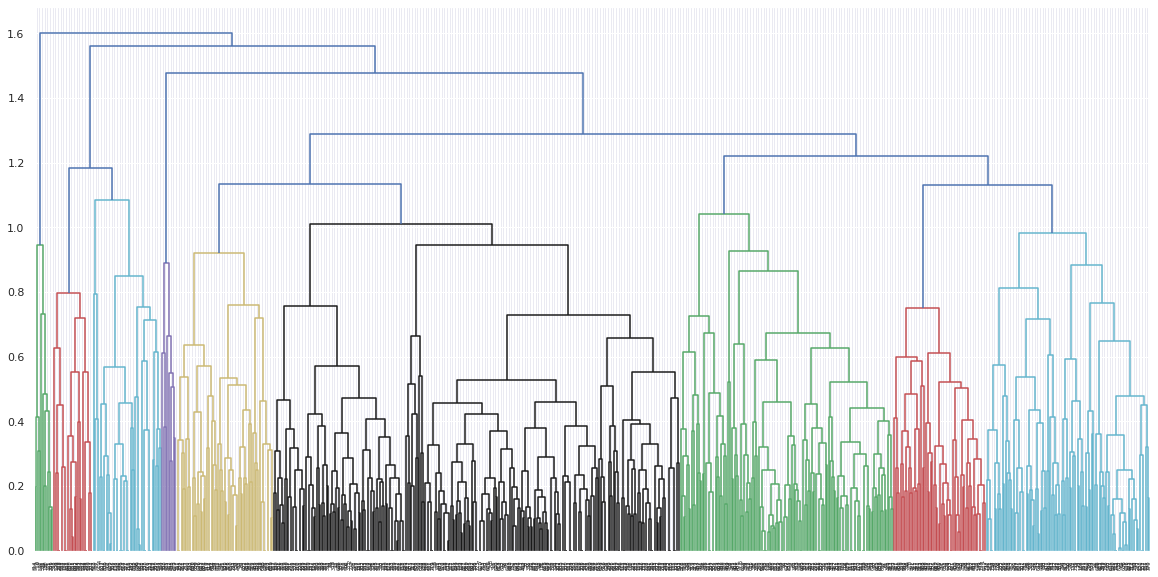

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='complete'))
plt.show()

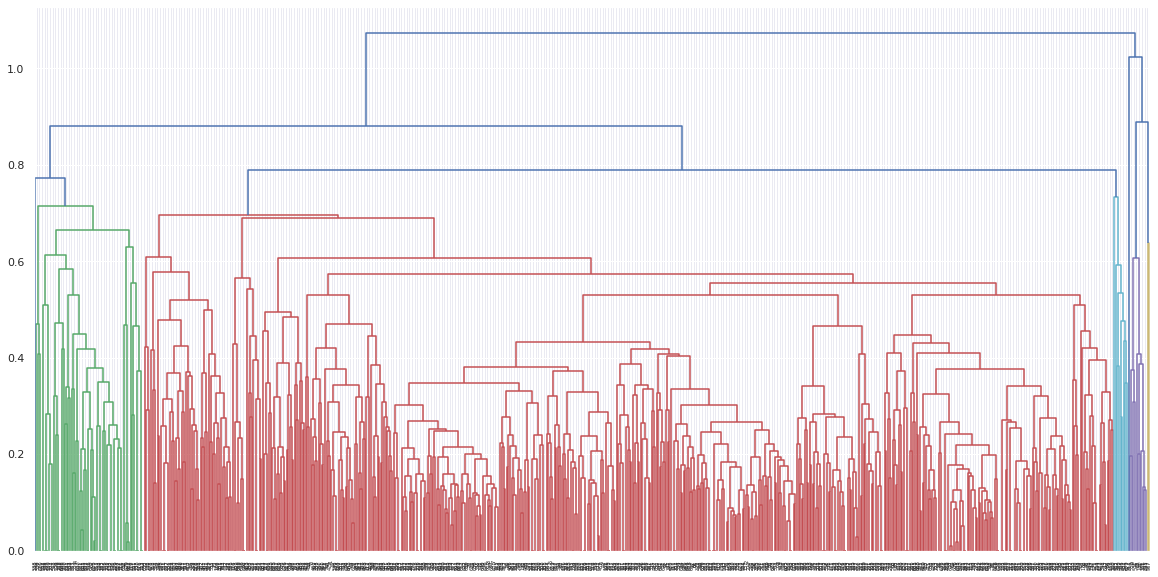

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='average'))
plt.show()

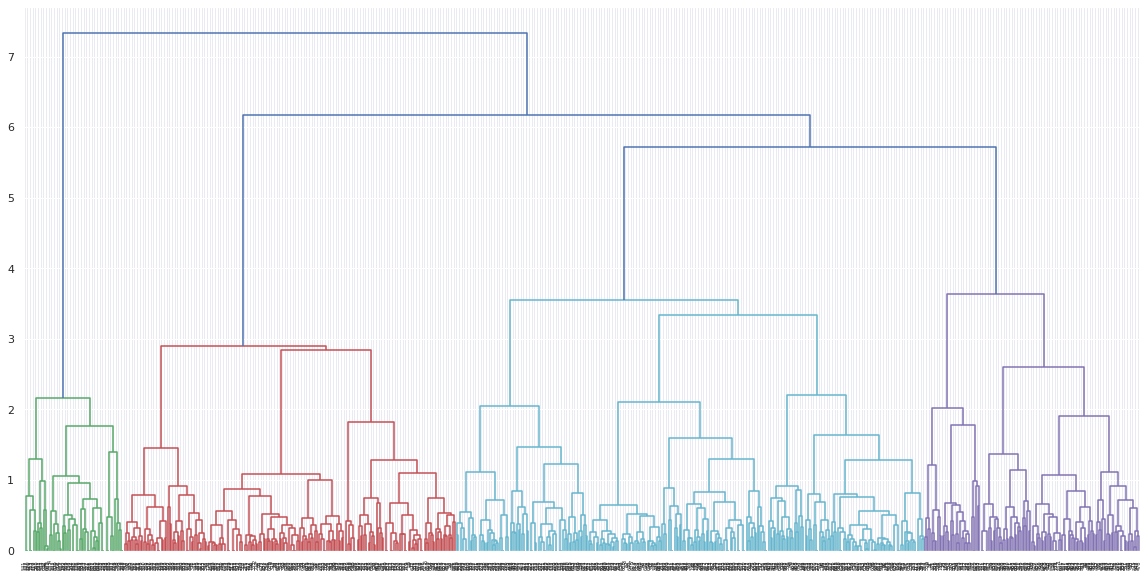

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, method='ward'))
plt.show()

In [0]:
# Defining the agglomerative clustering
c_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'cosine', linkage='complete')
# Fit model
complete_model = c_cluster.fit_predict(X)

# Defining the agglomerative clustering
a_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'cosine', linkage='average')
# Fit model
average_model = a_cluster.fit_predict(X)

# Defining the agglomerative clustering
w_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'euclidean', linkage='ward')
# Fit model
ward_model = w_cluster.fit_predict(X)

In [0]:
# Get meterics 
print("The silhoutte score of the model with complete linkage is: {}"
      .format(metrics.silhouette_score(X, complete_model, metric='euclidean')))


print("The silhoutte score of the model with average linkage is: {}"
      .format(metrics.silhouette_score(X, average_model, metric='euclidean')))


print("The silhoutte score of the model with ward linkage is: {}"
      .format(metrics.silhouette_score(X, ward_model, metric='euclidean')))

The silhoutte score of the model with complete linkage is: 0.1697878736701893
The silhoutte score of the model with average linkage is: 0.3406166825708934
The silhoutte score of the model with ward linkage is: 0.17673757119711483


In [0]:
# Defining the agglomerative clustering
c_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'cosine', linkage='complete')
# Fit model
complete_model = c_cluster.fit_predict(X)

# Defining the agglomerative clustering
a_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'cosine', linkage='average')
# Fit model
average_model = a_cluster.fit_predict(X)

# Defining the agglomerative clustering
w_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'euclidean', linkage='ward')
# Fit model
ward_model = w_cluster.fit_predict(X)

In [0]:
# Get meterics 
print("The silhoutte score of the model with complete linkage is: {}"
      .format(metrics.silhouette_score(X, complete_model, metric='euclidean')))


print("The silhoutte score of the model with average linkage is: {}"
      .format(metrics.silhouette_score(X, average_model, metric='euclidean')))


print("The silhoutte score of the model with ward linkage is: {}"
      .format(metrics.silhouette_score(X, ward_model, metric='euclidean')))

The silhoutte score of the model with complete linkage is: 0.1091278119347503
The silhoutte score of the model with average linkage is: 0.21579396136506826
The silhoutte score of the model with ward linkage is: 0.14056841208223547


## Try Hiearchical scaling for everything

In [0]:
#scale data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

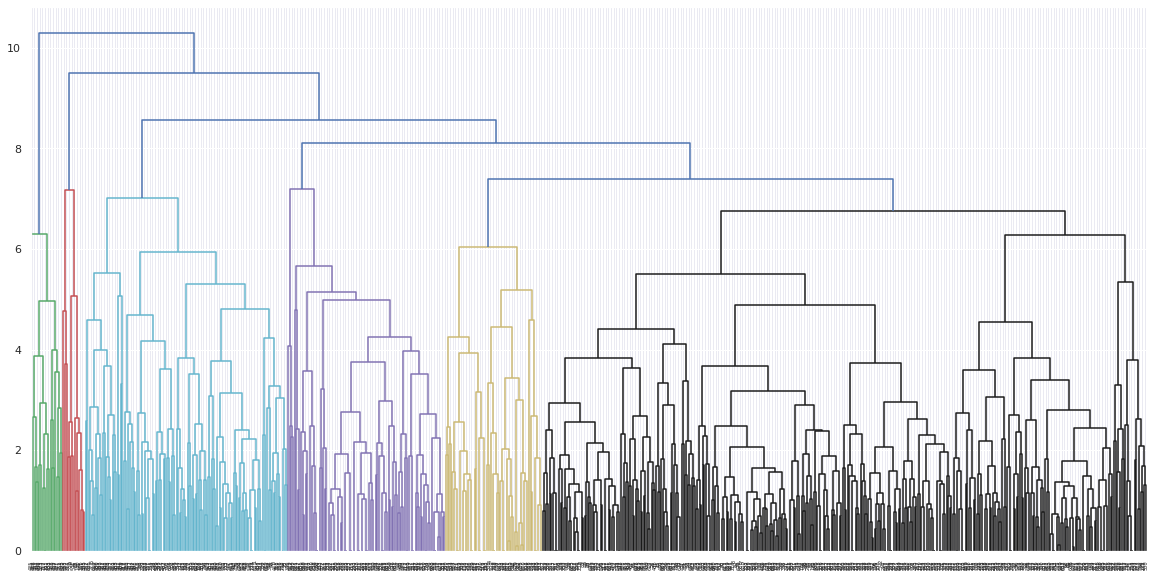

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

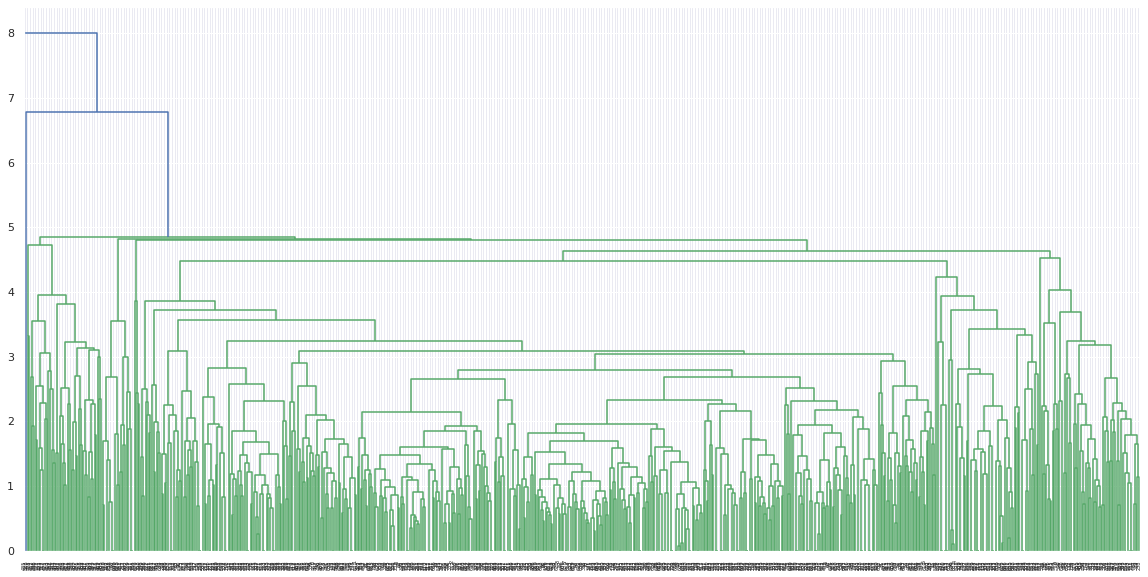

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

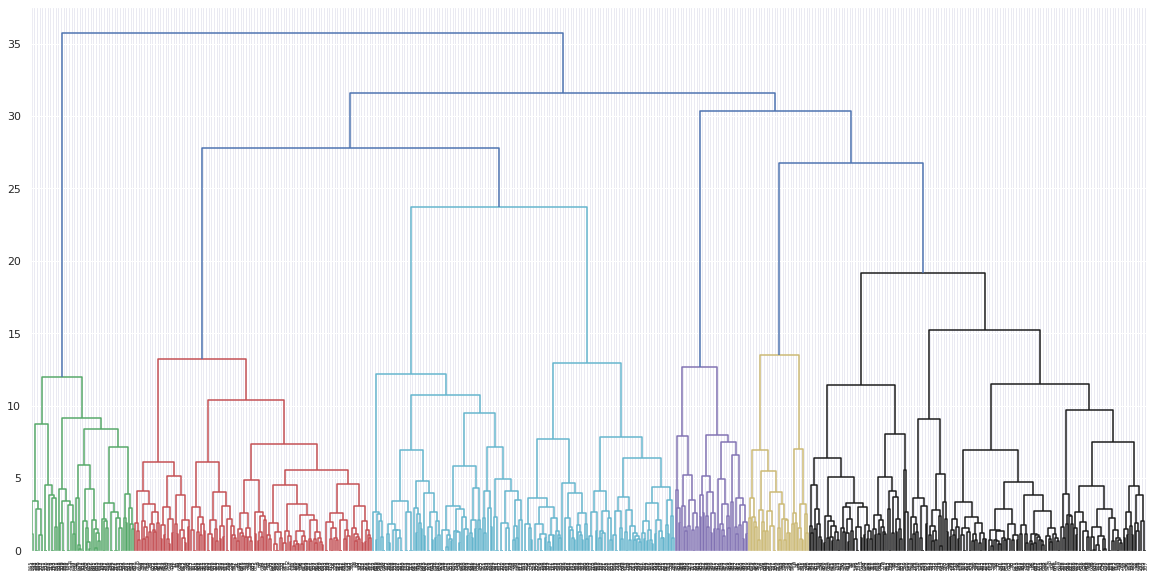

In [0]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [0]:
# Defining the agglomerative clustering
c_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'cosine', linkage='complete')
# Fit model
complete_model = c_cluster.fit_predict(X_std)

# Defining the agglomerative clustering
a_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'cosine', linkage='average')
# Fit model
average_model = a_cluster.fit_predict(X_std)

# Defining the agglomerative clustering
w_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'euclidean', linkage='ward')
# Fit model
ward_model = w_cluster.fit_predict(X_std)

In [0]:
print("The silhoutte score of the model with complete linkage is: {}"
      .format(metrics.silhouette_score(X_std, complete_model, metric='euclidean')))


print("The silhoutte score of the model with average linkage is: {}"
      .format(metrics.silhouette_score(X_std, average_model, metric='euclidean')))


print("The silhoutte score of the model with ward linkage is: {}"
      .format(metrics.silhouette_score(X_std, ward_model, metric='euclidean')))

The silhoutte score of the model with complete linkage is: 0.07936518574222902
The silhoutte score of the model with average linkage is: 0.20954017148092868
The silhoutte score of the model with ward linkage is: 0.14467535611697407


In [0]:
# Defining the agglomerative clustering
c_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'cosine', linkage='complete')
# Fit model
complete_model = c_cluster.fit_predict(X_std)

# Defining the agglomerative clustering
a_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'cosine', linkage='average')
# Fit model
average_model = a_cluster.fit_predict(X_std)

# Defining the agglomerative clustering
w_cluster = AgglomerativeClustering(n_clusters=8, affinity= 'euclidean', linkage='ward')
# Fit model
ward_model = w_cluster.fit_predict(X_std)

In [0]:
print("The silhoutte score of the model with complete linkage is: {}"
      .format(metrics.silhouette_score(X_std, complete_model, metric='euclidean')))


print("The silhoutte score of the model with average linkage is: {}"
      .format(metrics.silhouette_score(X_std, average_model, metric='euclidean')))


print("The silhoutte score of the model with ward linkage is: {}"
      .format(metrics.silhouette_score(X_std, ward_model, metric='euclidean')))

The silhoutte score of the model with complete linkage is: 0.060498601850371106
The silhoutte score of the model with average linkage is: 0.11171621956793039
The silhoutte score of the model with ward linkage is: 0.15284813645136244


In [0]:
# This Model is The Best 
a_cluster = AgglomerativeClustering(n_clusters=4, affinity= 'cosine', linkage='average')
# Fit model
average_model = a_cluster.fit_predict(X)

print(a_cluster.labels_)

[3 3 3 3 1 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 3 3 3 1 3 3 3 3 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 1 3 1 3
 3 3 1 3 3 3 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 3 1 3 3 3 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 3 3 3 3 1 3 3 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [0]:
df

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,tempo_scaled,cluster,x,y
0,0.645,0.585,0.0513,0.00314,0.000000,0.1650,0.353,131.931,pop,0.481327,1,0.089008,0.061488
1,0.799,0.586,0.0377,0.16200,0.000002,0.1930,0.549,120.970,pop,0.408215,2,-0.067671,0.229396
2,0.581,0.963,0.0981,0.02950,0.000000,0.1390,0.788,129.992,pop,0.468393,2,-0.345124,-0.095864
3,0.663,0.712,0.0381,0.06490,0.000000,0.1190,0.480,122.014,pop,0.415179,2,-0.035174,0.078922
4,0.738,0.483,0.0403,0.02620,0.616000,0.1060,0.355,93.458,pop,0.224705,3,0.386605,0.003698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.638,0.890,0.0399,0.02900,0.000005,0.0954,0.595,128.008,electronic,0.455160,2,-0.180230,-0.040286
96,0.704,0.793,0.0591,0.04880,0.000000,0.5750,0.412,127.960,electronic,0.454840,1,-0.048992,-0.065295
97,0.816,0.658,0.1030,0.02800,0.000019,0.0382,0.739,124.990,electronic,0.435029,2,-0.261495,0.153247
98,0.600,0.905,0.0357,0.00274,0.000000,0.8310,0.636,124.032,electronic,0.428639,2,-0.259160,-0.210020
